Sampling distribution

Sampling distribution refers to the distribution of a statistic, such as the sample mean, calculated from multiple random samples drawn from a population. It helps estimate
population parameters, test hypotheses, and analyze variability.

Procedure:

1. Define Population: Choose or generate the population data, like the total_bill column in the tips dataset.
2. Draw Samples: Randomly extract multiple samples of fixed size (e.g., 30) from the population.
3. Compute Statistics: Calculate the desired statistic (e.g., sample mean) for each sample.
4. Visualize: Plot a histogram or KDE of the sample statistics to observe the distribution.

The sampling distribution of the sample mean approximates a normal distribution as per the Central Limit Theorem. It centers around the population mean, with a reduced
spread (Standard Error), reflecting increased precision as sample size grows. Including population metrics like the mean and standard deviation in the visualization provides
insights into the relationship between population and sample statistics.

A sampling distribution for the tips dataset, treating it as the population is plotted. Samples are drawn randomly to calculate sample statistics (mean for total_bill), and
visualize their distribution:




Central limit theorem

The Central Limit Theorem is a cornerstone of statistics that explains why sampling distributions are essential for inferential statistics. It states that when a sufficiently large
number of random samples are drawn from any population, the sampling distribution of the sample mean tends to follow a normal distribution-regardless of the
population's original distribution. This property enables statisticians to make inferences about populations, even when they are not normally distributed. What Does the CLT
Tell Us? When repeatedly sampling from a population: The sampling distribution of the sample mean approaches a normal distribution as the sample size increases. The
mean of the sampling distribution equals the population mean


In [4]:
from dataclasses import replace

import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [8]:
tips=sns.load_dataset('tips')
data={"total_bill":tips["total_bill"],"tip":tips["tip"]}
df=pd.DataFrame(data)
df

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [9]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
#population mean and population standard deviation
population=df['total_bill']
population_mean=np.mean(population)
population_std=np.std(population)
print(population_mean,population_std)

19.78594262295082 8.884150577771132


In [19]:
#step 1: Draw a random sample and compute the mean of the data
sample_size=30
num_of_samples=500
sample_means=[]
for i in range(num_of_samples):
    sample=np.random.choice(population,size=sample_size,replace=False)
    sample_means.append(np.mean(sample))
print(list(map(round, sample_means)))

[18, 20, 21, 17, 21, 22, 21, 18, 17, 18, 19, 21, 21, 19, 19, 18, 21, 18, 19, 18, 19, 21, 20, 22, 21, 21, 20, 19, 21, 19, 20, 18, 20, 20, 18, 19, 20, 21, 22, 19, 21, 20, 16, 20, 17, 19, 19, 19, 21, 18, 20, 17, 19, 19, 21, 20, 19, 19, 20, 19, 18, 22, 20, 21, 21, 20, 21, 22, 17, 20, 20, 20, 19, 17, 22, 21, 19, 21, 18, 22, 18, 21, 20, 20, 21, 24, 17, 18, 19, 22, 19, 20, 20, 19, 19, 19, 21, 20, 19, 20, 21, 21, 21, 17, 20, 21, 21, 20, 19, 19, 21, 18, 20, 19, 22, 20, 21, 18, 21, 23, 20, 18, 18, 19, 19, 21, 22, 21, 21, 19, 20, 21, 22, 23, 21, 20, 20, 18, 21, 19, 18, 21, 20, 18, 20, 17, 21, 18, 20, 21, 18, 21, 19, 19, 20, 23, 23, 21, 19, 18, 19, 21, 19, 17, 20, 20, 23, 21, 19, 21, 21, 19, 21, 22, 23, 18, 19, 20, 17, 20, 19, 20, 20, 19, 17, 20, 20, 21, 19, 20, 19, 22, 17, 19, 20, 21, 19, 20, 22, 20, 22, 19, 19, 19, 18, 16, 20, 22, 20, 19, 19, 20, 19, 20, 20, 20, 20, 17, 18, 18, 20, 17, 22, 20, 22, 20, 20, 21, 20, 20, 20, 21, 20, 20, 19, 18, 20, 18, 22, 19, 20, 21, 21, 19, 19, 22, 21, 17, 18, 22,

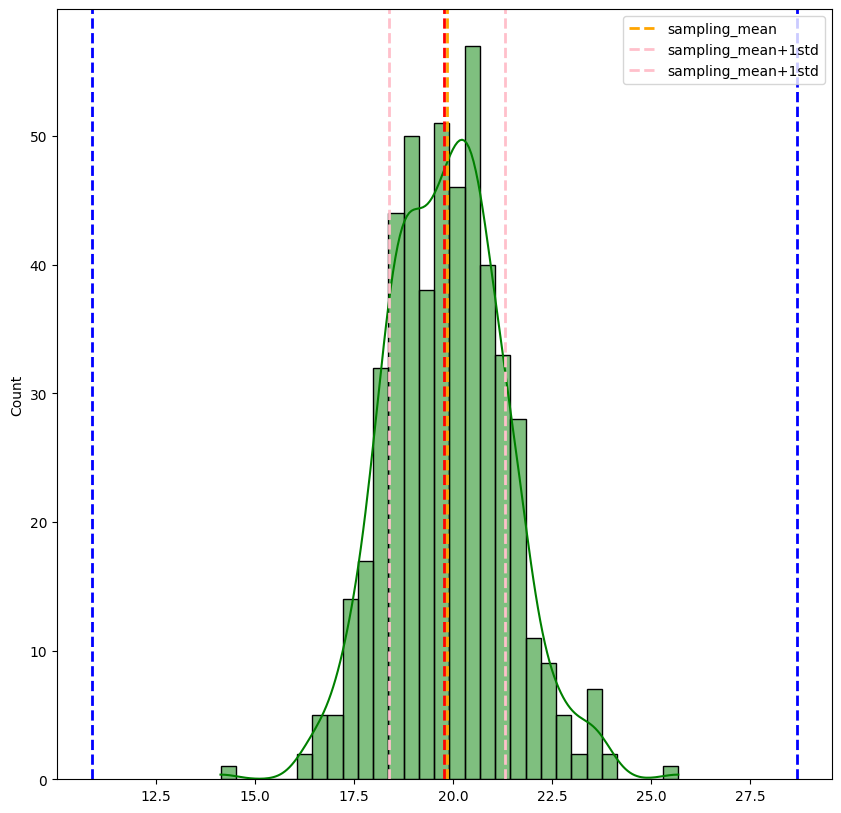

In [27]:
#visualize the sampling distribution
sampling_mean=np.mean(sample_means)
sampling_std=np.std(sample_means)

plt.figure(figsize=[10,10])
sns.histplot(sample_means,kde=True,color='green',bins=30)
plt.axvline(population_mean,color='red',linestyle='--',linewidth=2)
plt.axvline(population_mean+population_std,color='blue',linestyle='--',linewidth=2)
plt.axvline(population_mean-population_std,color='blue',linestyle='--',linewidth=2)

# add vertical line for sample mean and std

plt.axvline(sampling_mean, color="orange", linestyle="--", linewidth=2, label="sampling_mean")
plt.axvline(sampling_mean+sampling_std, color="pink", linestyle="--", linewidth=2, label="sampling_mean+1std",)
plt.axvline(sampling_mean-sampling_std,color="pink", linestyle="--", linewidth=2, label="sampling_mean+1std")

plt. legend()

In [33]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [35]:
population=tips['sex']=="Male"
n_sample=1000
sample_size=30
population

0      False
1       True
2       True
3       True
4      False
       ...  
239     True
240    False
241     True
242     True
243    False
Name: sex, Length: 244, dtype: bool

In [41]:
sample_proportion=[np.mean(np.random.choice(population,size=sample_size,replace=True)) for _ in range(n_sample)]
print(sample_proportion)

[np.float64(0.6666666666666666), np.float64(0.7333333333333333), np.float64(0.7), np.float64(0.6), np.float64(0.5), np.float64(0.6666666666666666), np.float64(0.6), np.float64(0.7), np.float64(0.7666666666666667), np.float64(0.5666666666666667), np.float64(0.5666666666666667), np.float64(0.7666666666666667), np.float64(0.6), np.float64(0.5), np.float64(0.7666666666666667), np.float64(0.5), np.float64(0.6), np.float64(0.5666666666666667), np.float64(0.5), np.float64(0.5666666666666667), np.float64(0.7333333333333333), np.float64(0.7), np.float64(0.7), np.float64(0.8333333333333334), np.float64(0.7333333333333333), np.float64(0.6666666666666666), np.float64(0.5666666666666667), np.float64(0.6666666666666666), np.float64(0.6666666666666666), np.float64(0.7333333333333333), np.float64(0.7), np.float64(0.5666666666666667), np.float64(0.6666666666666666), np.float64(0.6666666666666666), np.float64(0.5666666666666667), np.float64(0.5), np.float64(0.6333333333333333), np.float64(0.633333333333

Text(0, 0.5, 'Density')

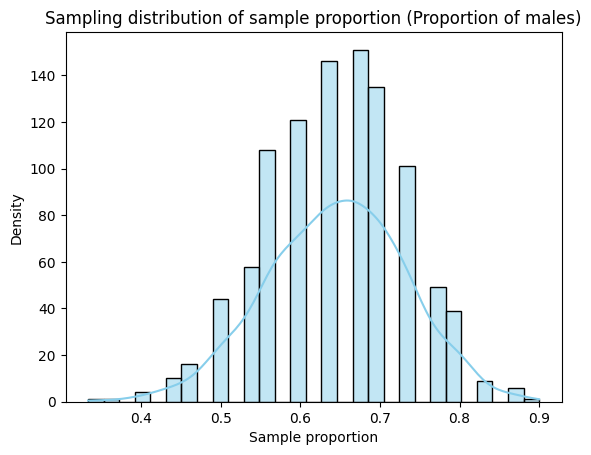

In [44]:
#plot the sampling distribution
sns.histplot(sample_proportion,color="skyblue",edgecolor="black",kde=True)
plt.title("Sampling distribution of sample proportion (Proportion of males)")
plt.xlabel("Sample proportion")
plt.ylabel("Density")